In [1]:
import torch 
from pyg_nbody import NBodySimulator

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

/Users/pablo/miniconda3/envs/pytorch-geometric/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
nParticles = 5
x0 = torch.randn((nParticles, 3))
v0 = torch.randn((nParticles, 3))

# Set the Z coordinate to 0 for 2D simulation
x0[:, 2] = 0
v0[:, 2] = 0

# Set the masses to 1
masses = torch.ones((nParticles, 1))

sim = NBodySimulator(masses, x0, v0, device='cpu')

In [3]:
# Simulate
x, v = sim.run(0.1, 100)

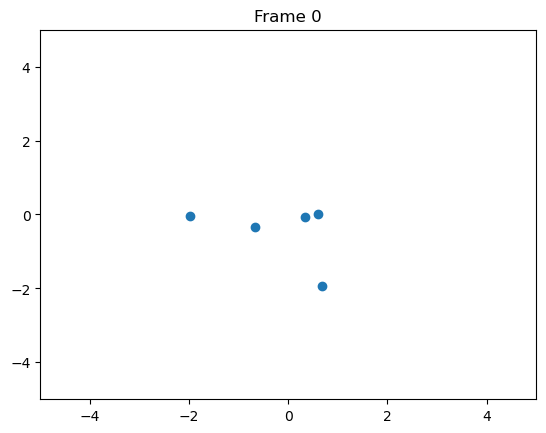

In [4]:
# Create the figure and axis for the animation
fig, ax = plt.subplots()

# Define the function to update the scatter plot at each frame
def update(i):
    ax.clear()
    ax.scatter(x[i, :, 0], x[i, :, 1])
    ax.set_xlim(-5, 5)  # adjust limits as needed
    ax.set_ylim(-5, 5)
    ax.set_title(f"Frame {i}")

# Create the animation using FuncAnimation
anim = FuncAnimation(fig, update, frames=100, interval=50)

# Show the animation
HTML(anim.to_jshtml())